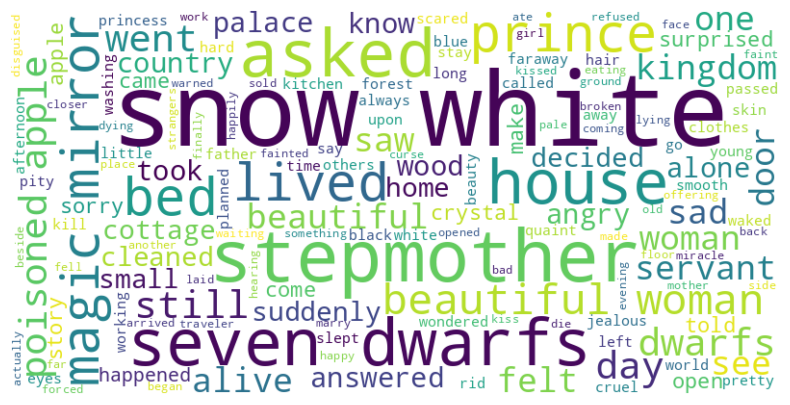

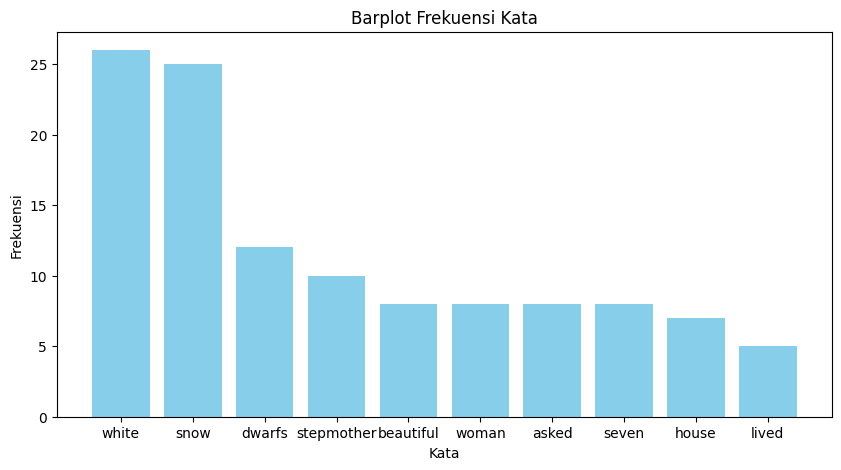

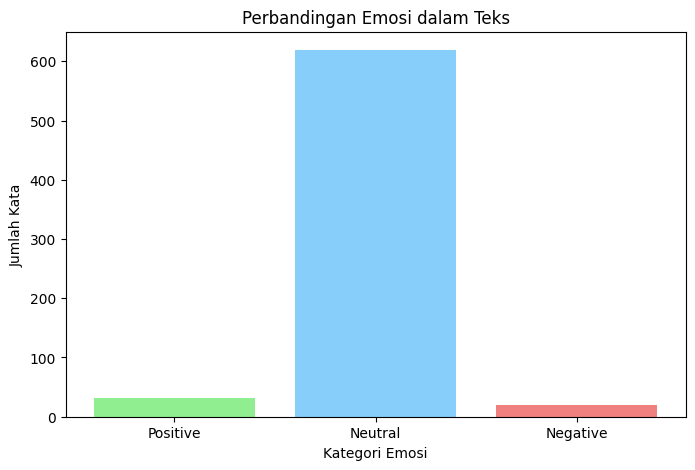

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from textblob import TextBlob

# Load stop words
stop_words = set(stopwords.words('english'))

# Membaca teks
file_path = 'story.txt' 
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Tokenisasi 
words = word_tokenize(story)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
cleaned_story = ' '.join(words)

# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_story)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Analisa frekuensi kata
word_freq = FreqDist(words)
plt.figure(figsize=(10, 5))
common_words = [word[0] for word in word_freq.most_common(10)]
word_counts = [word[1] for word in word_freq.most_common(10)]
plt.bar(common_words, word_counts, color='skyblue')
plt.title('Barplot Frekuensi Kata')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()

# Analisis sentimen dengan textblob
text_blob = TextBlob(story)
polarity = text_blob.sentiment.polarity

# Mengkonversi polaritas menjadi kategori emosi
if polarity > 0:
    emotion_category = 'Positive'
elif polarity < 0:
    emotion_category = 'Negative'
else:
    emotion_category = 'Neutral'

positive_words = [word.lower() for word in text_blob.words if TextBlob(word).sentiment.polarity > 0]
neutral_words = [word.lower() for word in text_blob.words if TextBlob(word).sentiment.polarity == 0]
negative_words = [word.lower() for word in text_blob.words if TextBlob(word).sentiment.polarity < 0]

# Menampilkan barplot perbandingan emosi
emotion_categories = ['Positive', 'Neutral', 'Negative']
word_counts = [len(positive_words), len(neutral_words), len(negative_words)]
plt.figure(figsize=(8, 5))
plt.bar(emotion_categories, word_counts, color=['lightgreen', 'lightskyblue', 'lightcoral'])
plt.title('Perbandingan Emosi dalam Teks')
plt.xlabel('Kategori Emosi')
plt.ylabel('Jumlah Kata')
plt.show()
